In [28]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import  DecisionTreeClassifier,DecisionTreeRegressor


In [30]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\tested.csv")

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [34]:
new_df = df.drop(columns=["PassengerId","Name","Ticket","Cabin"])

In [35]:
new_df 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [36]:
x = new_df.drop(columns = "Survived")

y = new_df["Survived"]

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size  = 0.2,random_state  = 2)

In [37]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
280,3,female,23.0,0,0,8.6625,S
284,3,female,2.0,1,1,20.2125,S
40,3,male,39.0,0,1,13.4167,C
17,3,male,21.0,0,0,7.2250,C
362,2,female,31.0,0,0,21.0000,S
...,...,...,...,...,...,...,...
299,3,male,29.0,0,0,7.8542,S
22,1,female,NaN,0,0,31.6833,S
72,3,female,29.0,0,0,7.9250,S
15,2,female,24.0,1,0,27.7208,C


In [38]:
transformer = ColumnTransformer(transformers = [('impute', SimpleImputer(),["Age"]),
                                                ('impute2', SimpleImputer(),["Fare"]),
                                               ('ohe',OneHotEncoder(),["Sex"]),
                                               ('oee',OrdinalEncoder(),["Embarked"])],
                               remainder = "passthrough")

In [43]:
x_train = transformer.fit_transform(x_train)

In [44]:
x_test = transformer.transform(x_test)

In [56]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [52]:
preprocessing = RobustScaler()

In [55]:
x_train =preprocessing.fit_transform(x_train)
x_test = preprocessing.transform(x_test)

In [57]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
rand = RandomForestClassifier()

In [58]:
rand.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [60]:
lr.fit(x_train,y_train)


LogisticRegression()

In [61]:
y_predict = lr.predict(x_test)

In [74]:
accuracy = accuracy_score(y_test,y_predict)
confusion = confusion_matrix(y_test,y_predict)
classification = classification_report(y_test,y_predict)
print("accuracy score",accuracy,"\n" )
print("confusion matrix","\n",confusion,"\n")
print("classification report","\n",classification,"\n")


accuracy score 1.0 

confusion matrix 
 [[51  0]
 [ 0 33]] 

classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84
 



In [64]:
y_predict2 = knn.predict(x_test)

In [75]:
accuracy = accuracy_score(y_test,y_predict2)
confusion = confusion_matrix(y_test,y_predict2)
classification = classification_report(y_test,y_predict2)
print("accuracy score",accuracy,"\n" )
print("confusion matrix","\n",confusion,"\n")
print("classification report","\n",classification,"\n")


accuracy score 0.9523809523809523 

confusion matrix 
 [[50  1]
 [ 3 30]] 

classification report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.97      0.91      0.94        33

    accuracy                           0.95        84
   macro avg       0.96      0.94      0.95        84
weighted avg       0.95      0.95      0.95        84
 



In [66]:
y_predict3 = rand.predict(x_test)

In [76]:
accuracy = accuracy_score(y_test,y_predict3)
confusion = confusion_matrix(y_test,y_predict3)
classification = classification_report(y_test,y_predict3)
print("accuracy score",accuracy,"\n" )
print("confusion matrix","\n",confusion,"\n")
print("classification report","\n",classification,"\n")


accuracy score 1.0 

confusion matrix 
 [[51  0]
 [ 0 33]] 

classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84
 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

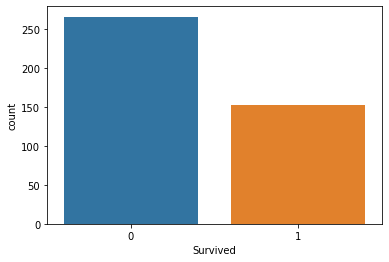

In [78]:
sns.countplot(df.Survived)

In [82]:
df.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64